In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import rayleigh, triang, laplace, uniform, expon
from scipy.special import j0
from generate_corr_sequence import gen_corr_sequence

linear ACF of Rayleigh distribution
exp ACF of Rayleigh distribution
dumped cosine ACF of Rayleigh distribution
bessel ACF of Rayleigh distribution


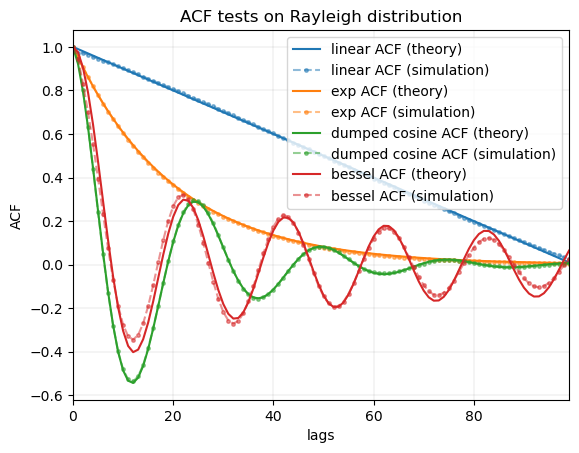

---------------------------------------------
linear ACF of uniform distribution
exp ACF of uniform distribution
dumped cosine ACF of uniform distribution
bessel ACF of uniform distribution


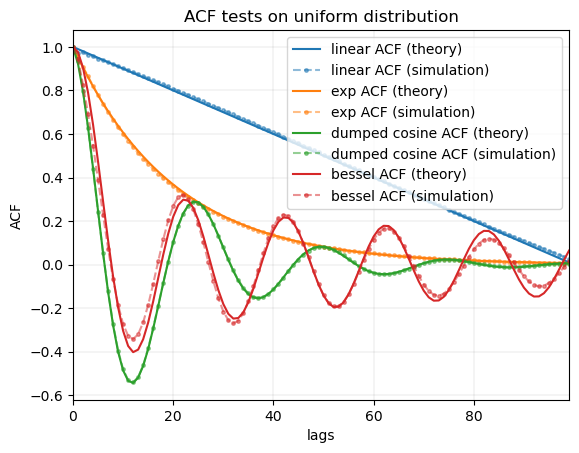

---------------------------------------------
linear ACF of triangular distribution
exp ACF of triangular distribution
dumped cosine ACF of triangular distribution
bessel ACF of triangular distribution


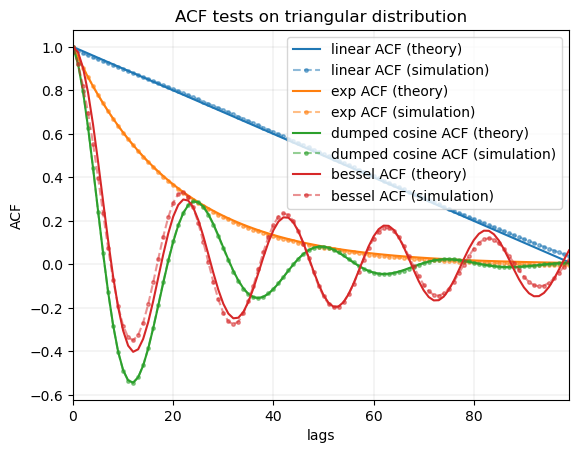

---------------------------------------------
linear ACF of exponential distribution
exp ACF of exponential distribution
dumped cosine ACF of exponential distribution
bessel ACF of exponential distribution


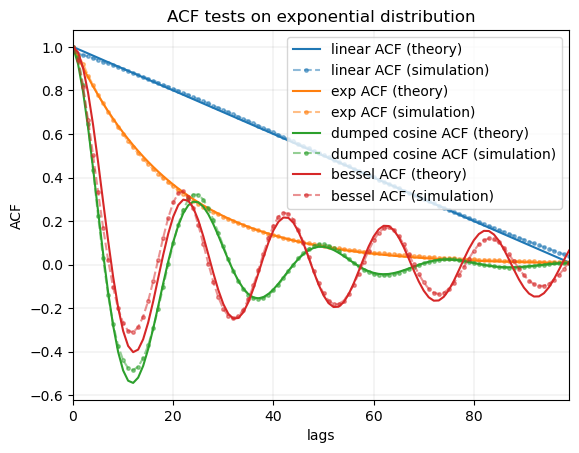

---------------------------------------------
linear ACF of Laplace distribution
exp ACF of Laplace distribution
dumped cosine ACF of Laplace distribution
bessel ACF of Laplace distribution


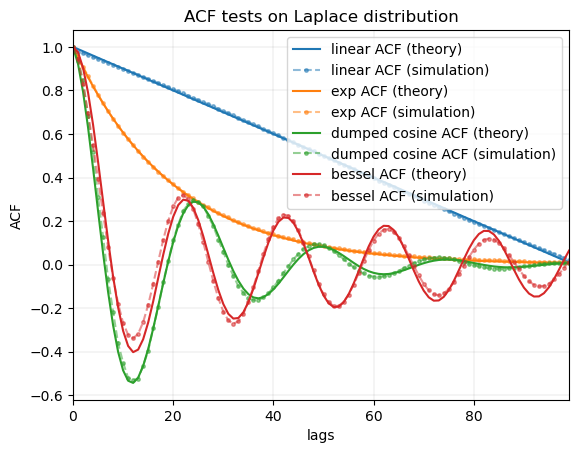

---------------------------------------------


In [2]:
m = np.arange(0,100)
targetACFs = [1 - np.minimum(m,100)/100,
              np.exp(-0.05*np.abs(m)),
              np.exp(-0.05*np.abs(m))*np.cos(0.25*np.abs(m)),
              np.array(j0(0.1*np.pi*abs(m)))]
targetACFs_names = ['linear', 'exp', 'dumped cosine', 'bessel']
PDFs_names = ['Rayleigh', 'uniform', 'triangular', 'exponential', 'Laplace']
PDFs= [rayleigh,
       uniform,
       triang(c=0.5, loc=-np.sqrt(6), scale=2 * np.sqrt(6)),
       expon,
       laplace]

for i, pdf in enumerate(PDFs):
    plt.figure()
    # https://stackoverflow.com/questions/42086276/get-default-line-colour-cycle
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for j, acf in enumerate(targetACFs):
        print(f'{targetACFs_names[j]} ACF of {PDFs_names[i]} distribution')
        y = gen_corr_sequence(PDFs[i], targetACFs[j])
        yCorr = sm.tsa.acf(y, nlags = len(acf)-1, fft = True) # the achieved
        plt.plot(m, acf, '-', markersize=5, color=cycle[j],
                 label = f'{targetACFs_names[j]} ACF (theory)')
        plt.plot(m, yCorr, '.--', markersize=5, alpha = 0.5, color=cycle[j],
                 label = f'{targetACFs_names[j]} ACF (simulation)')
        plt.title(f'ACF tests on {PDFs_names[i]} distribution')
        plt.xlabel('lags')
        plt.ylabel('ACF')
        plt.legend()
        plt.xlim(0, len(acf)-1)
        plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.savefig(f'{PDFs_names[i]}.png', dpi=300)
    plt.savefig(f'{PDFs_names[i]}.pdf')
    plt.show()
    print('---------------------------------------------')